# NonParametric_Mann_whitney

In [1]:
def import_csv(file):
    import pandas as pd 
    return pd.read_csv(file)

In [2]:
path = "Terminos_lagoon_TA_.csv"

In [3]:
CO2Data = import_csv(path)
print(CO2Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample                   106 non-null    object 
 1   date                     106 non-null    object 
 2   estuary                  106 non-null    object 
 3   area                     106 non-null    object 
 4   station                  106 non-null    object 
 5   layer_depth              106 non-null    object 
 6   season                   106 non-null    object 
 7   chlorophy_microg_l       106 non-null    float64
 8   cond_microsiemens_cm     106 non-null    float64
 9   depth_m                  106 non-null    float64
 10  do_percent_sat           106 non-null    float64
 11  do_mg_l                  106 non-null    float64
 12  sal_psu                  106 non-null    float64
 13  sp_cond_microsiemens_cm  106 non-null    float64
 14  turbidity_fnu            1

In [19]:
CO2Data

,sample,date,estuary,area,station,layer_depth,season,chlorophy_microg_l,cond_microsiemens_cm,depth_m,...,do_mg_l,sal_psu,sp_cond_microsiemens_cm,turbidity_fnu,temp_c,latitude,longitude,dic_micromol_kg,ta_micromol_kg,dummy_data
0,CDL01S,05/03/2020,Candelaria,River,CDL01,Surface,Dry,0.36,7015.4,0.464,...,7.12,3.56,6547.7,1.47,28.740,18.55736,-91.25012,3915,3863,3685.0
1,CDL01F,05/03/2020,Candelaria,River,CDL01,Bottom,Dry,4.19,29886.1,7.792,...,4.90,16.97,27751.2,95.33,29.028,18.55722,-91.24990,3698,3685,NaN
2,CDL02S,05/03/2020,Candelaria,River,CDL02,Surface,Dry,0.92,16691.1,0.453,...,6.99,8.94,15429.1,5.50,29.283,18.61007,-91.24410,3724,3708,3708.0
3,CDL02F,05/03/2020,Candelaria,River,CDL02,Bottom,Dry,2.23,24847.4,1.261,...,6.52,13.87,23074.0,13.44,29.024,18.61005,-91.24403,3667,3992,3992.0
4,CDL03S,05/03/2020,Candelaria,River,CDL03,Surface,Dry,0.58,46341.6,0.465,...,6.24,28.06,43670.8,3.60,28.202,18.63166,-91.29359,2928,3023,3023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,PLZ07F,10/02/2021,Palizada,Coast,PLZ07,Bottom,Dry,8.37,36889.2,2.829,...,7.92,22.81,36170.8,56.65,26.040,18.58745,-91.83044,2715,2851,2851.0
102,PLZ08S,10/02/2021,Palizada,Coast,PLZ08,Surface,Dry,2.73,37133.6,0.363,...,8.39,22.57,35851.5,5.90,26.872,18.64028,-91.86907,2638,2837,2837.0
103,PLZ08F,10/02/2021,Palizada,Coast,PLZ08,Bottom,Dry,9.27,39340.8,5.185,...,7.89,24.53,38622.9,173.00,25.973,18.63984,-91.86890,2608,2857,2857.0
104,PLZ09S,10/02/2021,Palizada,Coast,PLZ09,Surface,Dry,3.71,37034.5,0.384,...,8.62,22.57,35851.9,9.18,26.727,18.66676,-91.90047,2605,2804,2804.0


Mann-Whitney U test 

In [ ]:
from scipy.stats import mannwhitneyu

def mann_whitney_test(data1, data2, alpha=0.05):
    result = mannwhitneyu(data1, data2, alternative='two-sided')
    
    print(f'U statistic = {result.statistic}')
    print(f'p-value = {result.pvalue}')
    
    if result.pvalue < alpha:
        print("La diferencia estadística es relativa")
    else: 
        print("La diferencia estadística no es relativa")

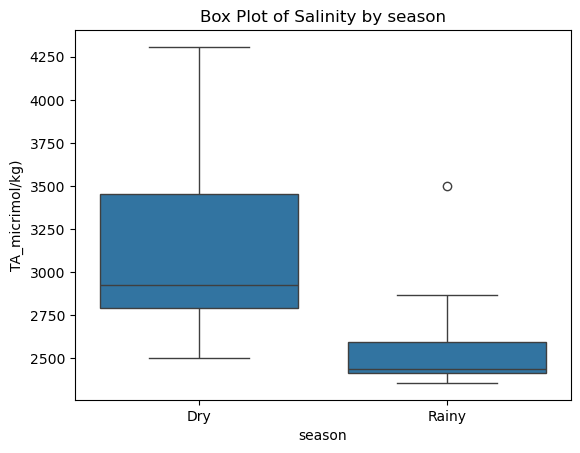

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.boxplot(x='season', y='ta_micromol_kg', data=CO2Data)

plt.xlabel('season')
plt.ylabel('TA_micrimol/kg)')
plt.title('Box Plot of Salinity by season')

plt.show()

In [10]:
ta_dry = CO2Data.loc[CO2Data["season"] == "Dry", "ta_micromol_kg"]
ta_rainy = CO2Data.loc[CO2Data["season"] == "Rainy", "ta_micromol_kg"]

mann_whitney_test(ta_dry, ta_rainy)

U statistic = 2251.5
p-value = 3.618607122062942e-12
La diferencia estadística es relativa


# Evaluate the Mann-Whitney U test for Dissolved Inorganic Carbon

* Boxplots

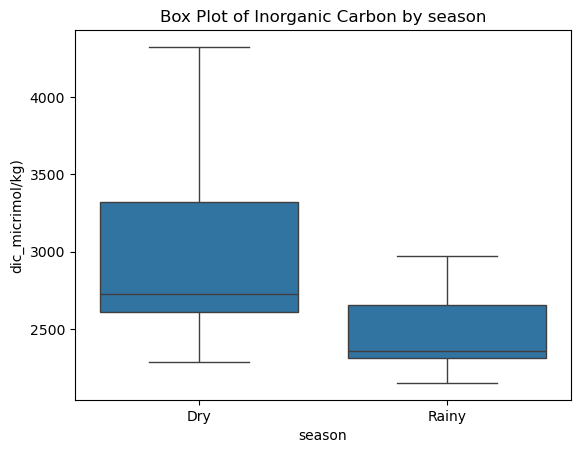

In [28]:
sns.boxplot(x='season', y='dic_micromol_kg', data=CO2Data)

plt.xlabel('season')
plt.ylabel('dic_micrimol/kg)')
plt.title('Box Plot of Inorganic Carbon by season')

plt.show()

In [29]:
dic_dry = CO2Data.loc[CO2Data["season"] == "Dry", "dic_micromol_kg"]
dic_rainy = CO2Data.loc[CO2Data["season"] == "Rainy", "dic_micromol_kg"]

mann_whitney_test(dic_dry, dic_rainy)

U statistic = 1942.5
p-value = 1.1746695070093673e-06
La diferencia estadística es relativa


- Violinplot

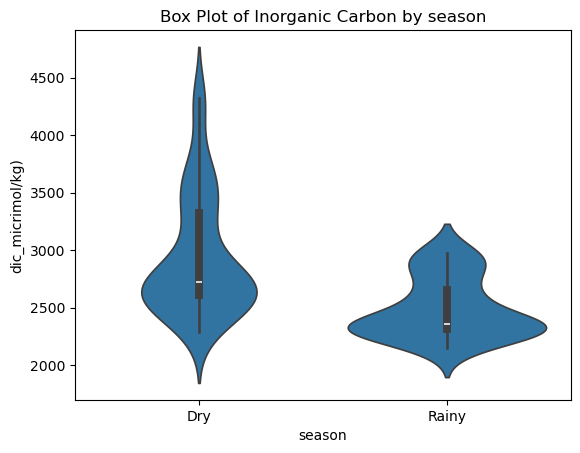

In [31]:
sns.violinplot(x='season', y='dic_micromol_kg', data=CO2Data)

plt.xlabel('season')
plt.ylabel('dic_micrimol/kg)')
plt.title('Box Plot of Inorganic Carbon by season')

plt.show()

# Evaluate the Mann-Whitney U test for Temperatura

C:\Users\Jaque\AppData\Local\Temp\ipykernel_14384\1373869653.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='area', y='temp_c', data=CO2Data,


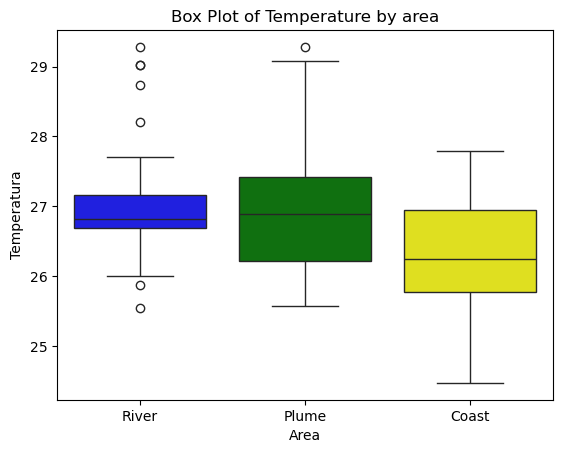

In [41]:
sns.boxplot(x='area', y='temp_c', data=CO2Data,
             palette={"River": "blue", "Plume": "green", "Coast": "yellow"}  
)


plt.xlabel('Area')
plt.ylabel('Temperatura')
plt.title('Box Plot of Temperature by area')

plt.show()

In [40]:
tem_river = CO2Data.loc[CO2Data["area"] == "River", "temp_c"]
tem_plume = CO2Data.loc[CO2Data["area"] == "Plume", "temp_c"]
tem_coast = CO2Data.loc[CO2Data["area"] == "Coast", "temp_c"]

mann_whitney_test(tem_river, tem_plume)
mann_whitney_test(tem_river, tem_coast)
mann_whitney_test(tem_plume, tem_coast)


U statistic = 633.5
p-value = 0.8097108251968999
La diferencia estadística no es relativa
U statistic = 840.5
p-value = 0.01572355128417009
La diferencia estadística es relativa
U statistic = 834.5
p-value = 0.018963761073965146
La diferencia estadística es relativa


- Violinplot


C:\Users\Jaque\AppData\Local\Temp\ipykernel_14384\777175603.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='area', y='temp_c', data=CO2Data,


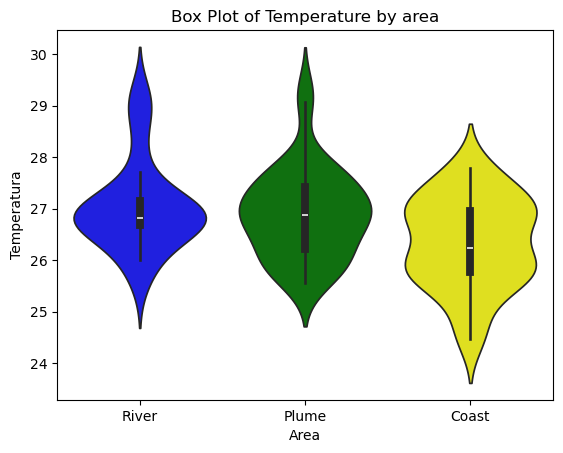

In [44]:
sns.violinplot(x='area', y='temp_c', data=CO2Data,
                palette={"River": "blue", "Plume": "green", "Coast": "yellow"}  
)


plt.xlabel('Area')
plt.ylabel('Temperatura')
plt.title('Box Plot of Temperature by area')

plt.show()